In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# imports
from glob import glob
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import models, layers, metrics, losses, regularizers

In [ ]:
folders= glob('/content/drive/MyDrive/DataCodes/Deep Learning/datasets/test_image/*')
folders

['/content/drive/MyDrive/DataCodes/Deep Learning/datasets/test_image/Pickup',
 '/content/drive/MyDrive/DataCodes/Deep Learning/datasets/test_image/Seden',
 '/content/drive/MyDrive/DataCodes/Deep Learning/datasets/test_image/SUV',
 '/content/drive/MyDrive/DataCodes/Deep Learning/datasets/test_image/Hatchback']

array([[154, 149, 146, ..., 250, 250, 250],
       [147, 131, 139, ..., 250, 250, 250],
       [127, 117, 121, ..., 251, 251, 251],
       ...,
       [176, 193, 207, ..., 106, 106, 106],
       [173, 174, 179, ..., 106, 106, 106],
       [154, 155, 159, ..., 106, 106, 106]], dtype=uint8)
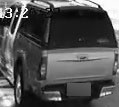

In [ ]:
img = cv2.imread(glob(folders[0] + "/*.jpg")[0], 0)
img

In [ ]:
def imgtoarr(path):
    img = cv2.imread(path, 0)
    img = cv2.resize(img, (64, 64))
    img_array = np.expand_dims(img, axis=-1)
    return img_array, img_array.reshape(1, 64, 64, 1)

In [ ]:
X = list()
y = list()
for folder in folders:
    images = glob(folder + '/*.jpg')
    for image in images:
        img_array, _ = imgtoarr(image)
        X.append(img_array)
        label = folder.split('/')[-1]
        y.append(label)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0, sampling_strategy='minority')

X = np.array(X)

X_resampled, y_resampled = smote.fit_resample(X.reshape(X.shape[0], -1), y)

X_resampled = X_resampled.reshape(X_resampled.shape[0], 64, 64, 1)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0, stratify=y_resampled)

In [ ]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
X_train.shape

(4232, 64, 64, 1)

In [ ]:
# initialization
model = models.Sequential()

# first layer
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.BatchNormalization())


# maxpooling
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# second layer
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.BatchNormalization())

# maxpooling
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# third layer
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(layers.BatchNormalization())

# maxpooling
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# # fourth layer
# model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# model.add(layers.BatchNormalization())

# # maxpooling
# model.add(layers.MaxPooling2D(pool_size=(2,2)))

# flatten
model.add(layers.Flatten())

# dense layer with dropout
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

# output layer
model.add(layers.Dense(4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 62, 62, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 29, 29, 128)       512       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',
              loss=losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=512, validation_split=0.2)

Epoch 1/100
7/7 [==============================] - 17s 770ms/step - loss: 2.1706 - accuracy: 0.5028 - val_loss: 71.7310 - val_accuracy: 0.3188
Epoch 2/100
7/7 [==============================] - 1s 136ms/step - loss: 0.7541 - accuracy: 0.6975 - val_loss: 58.5367 - val_accuracy: 0.3188
Epoch 3/100
7/7 [==============================] - 1s 136ms/step - loss: 0.5605 - accuracy: 0.7681 - val_loss: 54.1045 - val_accuracy: 0.3188
Epoch 4/100
7/7 [==============================] - 1s 136ms/step - loss: 0.4301 - accuracy: 0.8210 - val_loss: 33.5213 - val_accuracy: 0.3188
Epoch 5/100
7/7 [==============================] - 1s 138ms/step - loss: 0.3450 - accuracy: 0.8582 - val_loss: 24.3452 - val_accuracy: 0.3188
Epoch 6/100
7/7 [==============================] - 1s 138ms/step - loss: 0.2714 - accuracy: 0.8904 - val_loss: 21.6694 - val_accuracy: 0.3188
Epoch 7/100
7/7 [==============================] - 1s 153ms/step - loss: 0.2164 - accuracy: 0.9158 - val_loss: 17.6019 - val_accuracy: 0.3188
Epoch

In [ ]:
model.evaluate(X_test, y_test)

34/34 [==============================] - 0s 5ms/step - loss: 0.0256 - accuracy: 0.9953


[0.025563547387719154, 0.995278537273407]

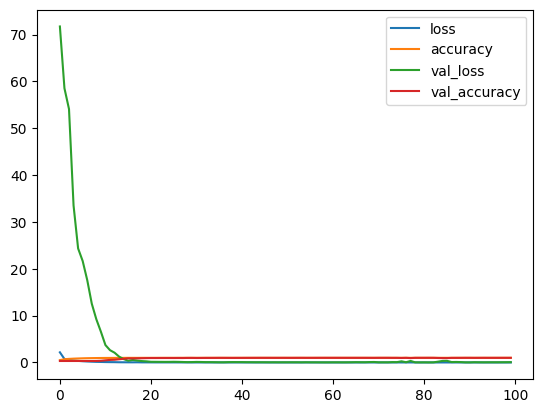

In [ ]:
import matplotlib.pyplot as plt
for k, v in history.history.items():
    plt.plot(v, label=k)
# plt.yticks([0.0, 0.5, 1.0])
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/DataCodes/Deep Learning/predtheprice_cnn.keras')

In [ ]:
model = models.load_model('/content/drive/MyDrive/DataCodes/Deep Learning/predtheprice_cnn.keras')

In [ ]:
model.evaluate(X_test, y_test)

34/34 [==============================] - 3s 14ms/step - loss: 0.0256 - accuracy: 0.9953


[0.025563547387719154, 0.995278537273407]

In [ ]:
_, test_image = imgtoarr('/content/PHOTO_535.jpg')
pred = model.predict(test_image)

1/1 [==============================] - 0s 304ms/step


In [ ]:
pred[0]

array([2.0240417e-07, 8.2431582e-09, 9.9999976e-01, 4.8077908e-08],
      dtype=float32)

In [ ]:
encoder.inverse_transform([0, 1, 2, 3])

array(['Hatchback', 'Pickup', 'SUV', 'Seden'], dtype='<U9')